In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px 
import statsmodels.formula.api as smf

Choose and download another data set from the UN data http://data.un.org/Explorer.aspx to explore. You may want to combine your new dataset with one or both of the datasets that you already worked with. Prepare a short (< 5 minute) presentation of your findings. Report any interesting correlations or trends that you find.

In [2]:
cellular_df = pd.read_csv(r'C:\Users\garre\Documents\NSS_Projects\un_data_question-Garrett-Holland\data\UN_Data_Cellular.csv', skipfooter=3, engine = 'python')

In [3]:
gdp_df = pd.read_csv(r'C:\Users\garre\Documents\NSS_Projects\un_data_question-Garrett-Holland\data\gdp_per_capita.csv.csv', skipfooter = 2, engine = 'python')

In [4]:
gdp_df = (gdp_df
    .drop(columns = 'Value Footnotes')
    .rename(columns = {
        'Country or Area':'Country',
        'Value':'GDP_Per_Capita'})
)

In [5]:
cellular_df = (cellular_df
               .drop(columns = [
                  'Value Footnotes',
                  'Source',
                  'Unit',
                  'Subgroup'])
                .rename(columns = {
                   'Value':'Cellular Subscribers per 100 pop',
                   'Country or Area':'Country'})
)

In [6]:
cellular_df

,Country,Year,Cellular Subscribers per 100 pop
0,Afghanistan,2011,54
1,Albania,2011,96
2,Algeria,2011,99
3,Andorra,2011,75
4,Angola,2011,48
...,...,...,...
188,Western and Central Africa,2011,54
189,World,2011,85
190,Yemen,2011,47
191,Zambia,2011,61


In [7]:
cellular_df.describe()

,Year,Cellular Subscribers per 100 pop
count,193.0,193.000000
mean,2011.0,91.932642
std,0.0,40.887047
min,2011.0,3.000000
25%,2011.0,63.000000
50%,2011.0,98.000000
75%,2011.0,118.000000
max,2011.0,204.000000


In [8]:
gdp_2011 = gdp_df[gdp_df["Year"] == 2011]

In [9]:
gdp_2011.drop_duplicates()

,Country,Year,GDP_Per_Capita
8,Afghanistan,2011,1904.559799
26,Albania,2011,11088.087801
56,Algeria,2011,11078.240516
86,Angola,2011,7675.445768
116,Antigua and Barbuda,2011,17604.417102
...,...,...,...
6730,Vietnam,2011,5352.011422
6760,West Bank and Gaza,2011,5782.689593
6786,World,2011,14275.461871
6816,Zambia,2011,3201.289398


In [10]:
merge_2011 = pd.merge(gdp_2011, cellular_df, how='inner', on='Country')

In [11]:
merge_2011

,Country,Year_x,GDP_Per_Capita,Year_y,Cellular Subscribers per 100 pop
0,Afghanistan,2011,1904.559799,2011,54
1,Albania,2011,11088.087801,2011,96
2,Algeria,2011,11078.240516,2011,99
3,Angola,2011,7675.445768,2011,48
4,Antigua and Barbuda,2011,17604.417102,2011,182
...,...,...,...,...,...
148,Uruguay,2011,18573.854467,2011,141
149,Uzbekistan,2011,4880.862629,2011,92
150,World,2011,14275.461871,2011,85
151,Zambia,2011,3201.289398,2011,61


In [12]:
gdp_sort_merge = merge_2011.sort_values('GDP_Per_Capita', ascending=False)

In [13]:
gdp_sort_merge.head(15)

,Country,Year_x,GDP_Per_Capita,Year_y,Cellular Subscribers per 100 pop
81,Luxembourg,2011,108355.582583,2011,148
113,Qatar,2011,99146.849879,2011,123
122,Singapore,2011,81398.616628,2011,149
116,San Marino,2011,64729.872236,2011,112
132,Switzerland,2011,64624.388934,2011,130
102,Norway,2011,61352.456845,2011,117
145,United Arab Emirates,2011,56123.486157,2011,149
147,United States,2011,54806.116927,2011,106
8,Austria,2011,53272.527359,2011,155
66,Ireland,2011,52939.859293,2011,108


In [14]:
gdp_sort_merge.tail(15)

,Country,Year_x,GDP_Per_Capita,Year_y,Cellular Subscribers per 100 pop
0,Afghanistan,2011,1904.559799,2011,54
57,Guinea-Bissau,2011,1839.700981,2011,26
22,Burkina Faso,2011,1775.779620,2011,45
28,Chad,2011,1676.769051,2011,32
115,Rwanda,2011,1586.961550,2011,41
82,Madagascar,2011,1534.939918,2011,38
78,Liberia,2011,1488.278386,2011,49
121,Sierra Leone,2011,1469.033003,2011,36
46,Ethiopia,2011,1360.938538,2011,17
136,Togo,2011,1268.920509,2011,50


In [15]:
cell_sort_merge = merge_2011.sort_values('Cellular Subscribers per 100 pop', ascending=False)

In [16]:
cell_sort_merge.head(15)

,Country,Year_x,GDP_Per_Capita,Year_y,Cellular Subscribers per 100 pop
106,Panama,2011,23353.512250,2011,204
117,Saudi Arabia,2011,46988.991413,2011,191
4,Antigua and Barbuda,2011,17604.417102,2011,182
130,Suriname,2011,17742.592303,2011,179
103,Oman,2011,32529.013653,2011,169
48,Finland,2011,46863.642168,2011,166
85,Maldives,2011,17015.726023,2011,166
39,Dominica,2011,11970.344910,2011,164
79,Libya,2011,8479.946607,2011,156
8,Austria,2011,53272.527359,2011,155


In [17]:
cell_sort_merge.tail(15)

,Country,Year_x,GDP_Per_Capita,Year_y,Cellular Subscribers per 100 pop
82,Madagascar,2011,1534.939918,2011,38
121,Sierra Leone,2011,1469.033003,2011,36
107,Papua New Guinea,2011,3372.464463,2011,34
93,Mozambique,2011,1073.478711,2011,33
28,Chad,2011,1676.769051,2011,32
32,Comoros,2011,2924.722771,2011,29
100,Niger,2011,1020.997353,2011,27
57,Guinea-Bissau,2011,1839.700981,2011,26
27,Central African Republic,2011,1242.715645,2011,25
83,Malawi,2011,987.120423,2011,25


<AxesSubplot:xlabel='GDP_Per_Capita', ylabel='Cellular Subscribers per 100 pop'>

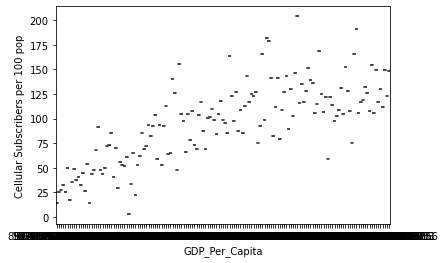

In [18]:
sns.boxplot(data=merge_2011, x = 'GDP_Per_Capita', y = 'Cellular Subscribers per 100 pop')

<AxesSubplot:xlabel='GDP_Per_Capita', ylabel='Cellular Subscribers per 100 pop'>

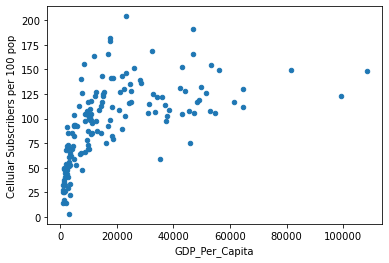

In [19]:
merge_2011.plot(kind='scatter', x = 'GDP_Per_Capita', y = 'Cellular Subscribers per 100 pop')

In [20]:
merge_2011['GDP_Per_Capita'].corr(merge_2011['Cellular Subscribers per 100 pop'])

0.5666565294729602

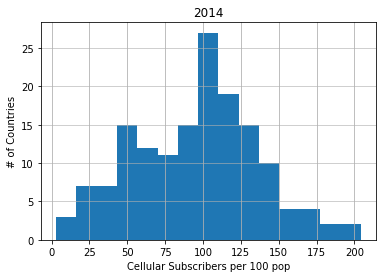

In [21]:
merge_2011['Cellular Subscribers per 100 pop'].plot.hist(grid=True, bins=15, rwidth=1.0)
plt.title('2014')
plt.xlabel('Cellular Subscribers per 100 pop')
plt.ylabel('# of Countries')
plt.grid(axis='y', alpha=0.75)

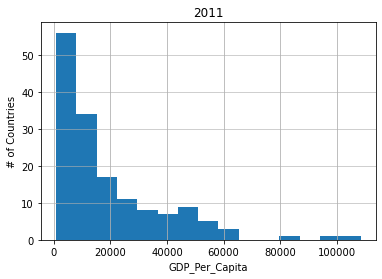

In [22]:
merge_2011['GDP_Per_Capita'].plot.hist(grid=True, bins=15, rwidth=1.0)
plt.title('2011')
plt.xlabel('GDP_Per_Capita')
plt.ylabel('# of Countries')
plt.grid(axis='y', alpha=0.75)

In [32]:
linreg = smf.ols('GDP_Per_Capita ~ Cellular Subscribers per 100 pop', data = merge_2011).fit()

SyntaxError: invalid syntax (<unknown>, line 1)

In [26]:
linreg.summary()

NameError: name 'linreg' is not defined